# Object Localization with TensorFlow

Created for the Coursera Guided Project: [Object Localization with TensorFlow](https://www.coursera.org/projects/object-localization-tensorflow)

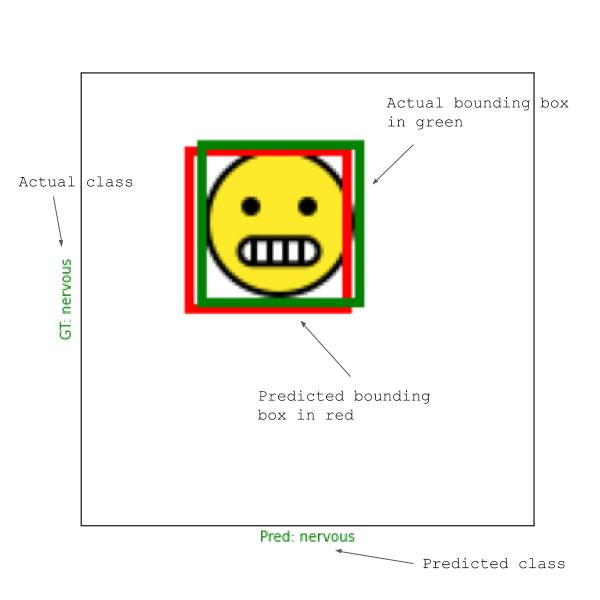

All emojis designed by [OpenMoji](https://openmoji.org/) – the open-source emoji and icon project. License: CC BY-SA 4.0

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/objectlocalization

/content/drive/MyDrive/objectlocalization


## Task 2: Download and Visualize Data

In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image, ImageDraw
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

print('Check if we are using TensorFlow 2.4')
print('Using TensorFlow version', tf.__version__)

Check if we are using TensorFlow 2.4
Using TensorFlow version 2.7.0


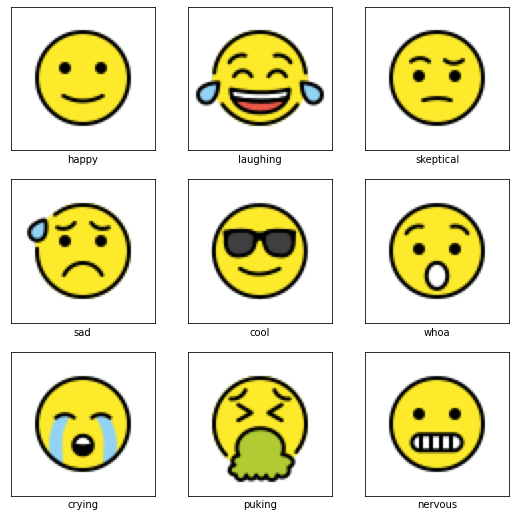

In [4]:
emojis = {
    0: {'name': 'happy', 'file': '1F642.png'},
    1: {'name': 'laughing', 'file': '1F602.png'},
    2: {'name': 'skeptical', 'file': '1F928.png'},
    3: {'name': 'sad', 'file': '1F630.png'},
    4: {'name': 'cool', 'file': '1F60E.png'},
    5: {'name': 'whoa', 'file': '1F62F.png'},
    6: {'name': 'crying', 'file': '1F62D.png'},
    7: {'name': 'puking', 'file': '1F92E.png'},
    8: {'name': 'nervous', 'file': '1F62C.png'}
}

plt.figure(figsize=(9, 9))

for i, (j, e) in enumerate(emojis.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join('emojis', e['file'])))
    plt.xlabel(e['name'])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Task 3: Create Examples

In [5]:
for class_id, values in emojis.items():
  png_file = Image.open(os.path.join('emojis', values['file'])).convert('RGBA')
  png_file.load()
  new_file = Image.new("RGB", png_file.size, (255, 255, 255))
  new_file.paste(png_file, mask=png_file.split()[3])
  emojis[class_id]['image'] = new_file

In [6]:
def create_examples():
  class_id = np.random.randint(0,9)
  image = np.ones((144, 144, 3)) * 255
  row = np.random.randint(0,72)
  col = np.random.randint(0,71)
  image[row:row+72, col:col+72, :] = np.array(emojis[class_id]["image"])
  return image.astype('uint8'), class_id, (row + 10)/ 144, (col+10)/ 144

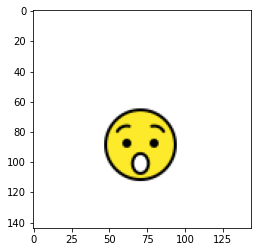

In [7]:
image, class_id, row, col = create_examples()
plt.imshow(image)

## Task 4: Plot Bounding Boxes

In [10]:
def plot_bounding_box(image, gt_coords, pred_coord = None , norm = False):
  if norm:
    image *= 255.
    image = image.astype("uint8")
  image = Image.fromarray(image)
  draw = ImageDraw.Draw(image)
  
  row, col = gt_coords
  row *= 144
  col *= 144
  draw.rectangle((col, row, col+52, row+52), outline="green", width=3)

  if pred_coord:
    row *= 144
    col *= 144
    draw.rectangle((col, row, col+52, row+52), outline="red", width=3)

  return image

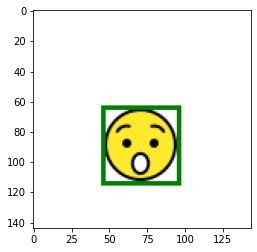

In [9]:
image = plot_bounding_box(image, gt_coords=[row, col])
plt.imshow(image)

## Task 5: Data Generator

In [13]:
def data_generator(batch_size = 16):
  while True:
    x_batch  = np.zeros((batch_size, 144, 144, 3))
    y_batch = np.zeros((batch_size, 9))
    bbox_batch = np.zeros((batch_size, 2))

    for i in range(0, batch_size):
      image, class_id , row, col = create_examples()
      x_batch[i] = image / 255.
      y_batch[i, class_id] = 1.0
      bbox_batch[i] = np.array([row, col])
    yield {"image": x_batch}, {"class_out":y_batch, "box_out": bbox_batch} 

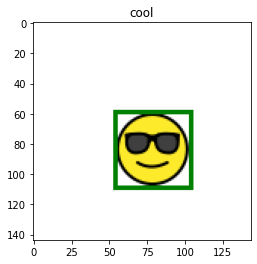

In [29]:
example, label = next(data_generator(1))
image = example["image"][0]
class_id = np.argmax(label["class_out"][0])
coords = label["box_out"][0]

image = plot_bounding_box(image, coords, norm=True )
plt.imshow(image)
plt.title(emojis[class_id]["name"])
plt.show()

## Task 6: Model

## Task 7: Custom Metric: IoU

## Task 8: Compile the Model

## Task 9: Custom Callback: Model Testing

## Task 10: Model Training